# Análisis de datos eficiente con Python

## Introducción

En este tutorial, exploraremos Polars, Una de las características clave de Polar es su enfoque en la eficiencia computacional. Al utilizar representaciones polares en lugar de la representación estándar de números complejos, es posible realizar muchas operaciones de manera más eficiente, ya que las operaciones trigonométricas son más rápidas que las operaciones complejas.

Además, Polar proporciona una serie de herramientas útiles para el procesamiento de señales, como la capacidad de filtrar señales, calcular la transformada de Fourier y realizar análisis espectrales. También se pueden realizar operaciones matemáticas y trigonométricas en números complejos con facilidad utilizando esta biblioteca.

En general, Polar es una biblioteca útil para cualquier persona que trabaje con señales y sistemas dinámicos, y que busque una forma más eficiente de procesar números complejos en Python.

## Índice
1) Instalación de Polars
2) Carga de datos
3) Manipulación de datos
4) Análisis exploratorio de datos
5) Rendimiento y optimización
6) Casos de uso
7) Conclusiones y recursos adicionales

## 1. Instalación Polars
Para empezar, asegúrece de tener Polars instalado en tu entorno. Puedes hacerlo ejecutando el siguiente comando en tu terminal

In [2]:
! pip install polars


     --------------------------------------- 18.9/18.9 MB 14.2 MB/s eta 0:00:00


### Importar Polars
Una vez que haya instalado Polars, puedes importarlo en tu notebook ejecutando la siguiente celda de código:


In [3]:
import polars as pl

## 2. Cargar datos
Para esta tarea crearemos un data frame como ejemplo y como manejar algunos datos

In [4]:
data = {
    'nombre': ['ismael', 'mario', 'diego', 'francisco'],
    'edad': [20, 19, 21, 30],
    'carrera': ['Informática', 'ing.sistemas', 'Física', 'Química']
}

df = pl.DataFrame(data)


### Explorar el DataFrame
Ahora que tenemos nuestro DataFrame, podemos explorar sus datos. Para mostrar el DataFrame en Jupyter Notebook, simplemente escribimos su nombre en una celda y lo ejecutamos:

In [5]:
df

nombre,edad,carrera
str,i64,str
"""ismael""",20,"""Informática"""
"""mario""",19,"""ing.sistemas"""
"""diego""",21,"""Física"""
"""francisco""",30,"""Química"""


## 3. Manipulación de datos
Polars proporciona una amplia gama de funciones para manipular y transformar datos. Veamos algunos ejemplos:

Selección de columnas:


In [6]:

# Seleccionar una columna
df.select("nombre")

# Seleccionar múltiples columnas
df.select(["nombre", "edad"])

nombre,edad
str,i64
"""ismael""",20
"""mario""",19
"""diego""",21
"""francisco""",30


### filtro de datos

In [7]:
# Filtrar por condición
df.filter(pl.col("edad") > 20)

nombre,edad,carrera
str,i64,str
"""diego""",21,"""Física"""
"""francisco""",30,"""Química"""


### Agregación y resumen de datos

In [8]:
# Calcular suma, promedio y conteo
df.select(pl.sum("nombre"), pl.avg("edad"), pl.count("carrera"))

nombre,edad,carrera
str,f64,u32
null,22.5,4


### Manejo de valores nulos:

In [9]:
# Filtrar filas con valores nulos
df.filter(pl.col("edad").is_null())


nombre,edad,carrera
str,i64,str


## 4. Análisis exploratorio de datos
Polars nos permite realizar análisis exploratorio de datos de manera sencilla. Veamos algunos ejemplos:

- Estadísticas descriptivas
- Visualización de datos utilizando bibliotecas externas
- Creación de gráficos utilizando Polars
- Ordenación y clasificación de datos




In [10]:
# Calcular estadísticas descriptivas básicas
df.describe()

describe,nombre,edad,carrera
str,str,f64,str
"""count""","""4""",4.0,"""4"""
"""null_count""","""0""",0.0,"""0"""
"""mean""",null,22.5,null
"""std""",null,5.066228,null
"""min""","""diego""",19.0,"""Física"""
"""max""","""mario""",30.0,"""ing.sistemas"""
"""median""",null,20.5,null
"""25%""",null,20.0,null
"""75%""",null,30.0,null


In [11]:
# Ordenar DataFrame por una columna
df.sort("edad")

# Clasificar DataFrame en base a múltiples columnas
df.sort(by=["edad", "carrera"])

nombre,edad,carrera
str,i64,str
"""mario""",19,"""ing.sistemas"""
"""ismael""",20,"""Informática"""
"""diego""",21,"""Física"""
"""francisco""",30,"""Química"""


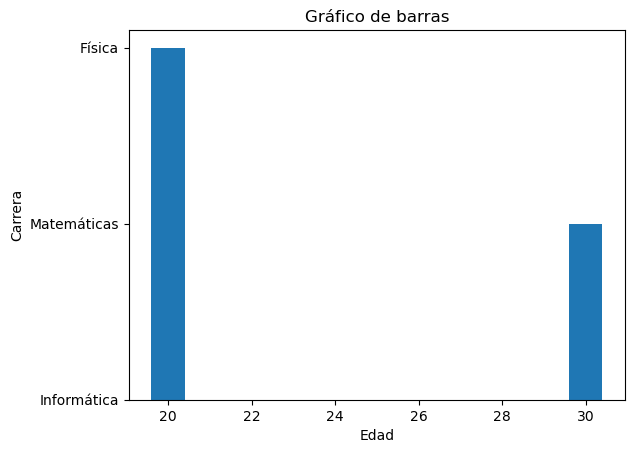

In [12]:
import matplotlib.pyplot as plt
import polars as pl

# Crear DataFrame de ejemplo
data = {'edad': [25, 30, 20],
        'carrera': ['Informática', 'Matemáticas', 'Física']}
df = pl.DataFrame(data)

# Obtener los valores de las columnas como listas
edad_values = df['edad'].to_list()
carrera_values = df['carrera'].to_list()

# Crear el gráfico de barras
plt.bar(edad_values, carrera_values)
plt.xlabel("Edad")
plt.ylabel("Carrera")
plt.title("Gráfico de barras")
plt.show()


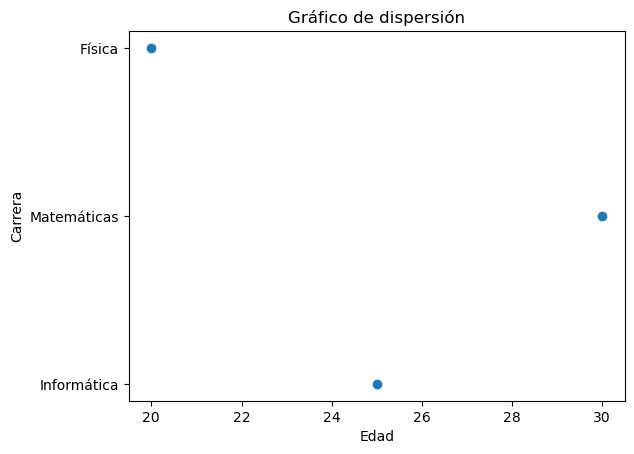

In [32]:
import matplotlib.pyplot as plt
import polars as pl

# Crear DataFrame de ejemplo
data = {'edad': [25, 30, 20],
        'carrera': ['Informática', 'Matemáticas', 'Física']}
df = pl.DataFrame(data)

# Obtener los valores de las columnas como listas
edad_values = df['edad'].to_list()
carrera_values = df['carrera'].to_list()

# Crear el gráfico de dispersión
plt.scatter(edad_values, carrera_values)
plt.xlabel("Edad")
plt.ylabel("Carrera")
plt.title("Gráfico de dispersión")
plt.show()

### 4.1 Ejemplo aplicativo
En este caso analizaremos un conjunto de datos 

In [2]:
import polars as pl
data = pl.read_csv("Matriculados_2016_al_2022.csv")
data

Código,Año Matrícula,Período,Tipo de hecho,Género,Nacionalidad,Año Nacimiento,Departamento Colegio,Distrito Residencia,Provincia Residencia,Departamento Residencia,Modalidad,Metodologia,Facultad,Especialidad,Ciclo Relativo
str,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,i64
"""eb983f187c0f48…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1967,"""LIMA""","""EL AGUSTINO""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10
"""000e2d0dcb4eaf…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1955,"""LIMA""","""CHACLACAYO""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""INGENIERÍA ELÉ…","""INGENIERÍA ELÉ…",9
"""fe34019137bdfa…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1970,"""LIMA""","""INDEPENDENCIA""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""INGENIERÍA ECO…","""INGENIERÍA ECO…",2
"""133807cb215cc4…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1971,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""INGENIERÍA ELÉ…","""INGENIERÍA ELE…",10
"""a0ae32c60ce685…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1957,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""INGENIERÍA ELÉ…","""INGENIERÍA ELE…",2
"""c46e619b7db76f…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1961,"""JUNIN""","""LIMA""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""CIENCIAS""","""QUÍMICA""",9
"""6730f8d00de687…",2016,1,"""REGULARES""","""FEMENINO""","""Peru""",1961,null,null,null,null,"""Pregrado""","""Presencial""","""INGENIERÍA IND…","""INGENIERÍA IND…",6
"""d78c18cd167805…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1971,"""JUNIN""","""CARABAYLLO""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""INGENIERÍA ELÉ…","""INGENIERÍA ELÉ…",7
"""b851d837273277…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1965,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""INGENIERÍA ECO…","""INGENIERÍA ECO…",10


In [11]:
# Calcular estadísticas descriptivas básicas
data.describe()


describe,Código,Año Matrícula,Período,Tipo de hecho,Género,Nacionalidad,Año Nacimiento,Departamento Colegio,Distrito Residencia,Provincia Residencia,Departamento Residencia,Modalidad,Metodologia,Facultad,Especialidad,Ciclo Relativo
str,str,f64,f64,str,str,str,f64,str,str,str,str,str,str,str,str,f64
"""count""","""163199""",163199.0,163199.0,"""163199""","""163199""","""163199""",163199.0,"""163199""","""163199""","""163199""","""163199""","""163199""","""163199""","""163199""","""163199""",163199.0
"""null_count""","""0""",0.0,0.0,"""0""","""268""","""2335""",0.0,"""6354""","""35394""","""34574""","""7388""","""0""","""0""","""0""","""0""",0.0
"""mean""",null,2018.968744,1.497282,null,null,null,1990.605341,null,null,null,null,null,null,null,null,5.282863
"""std""",null,1.986794,0.499994,null,null,null,96.982634,null,null,null,null,null,null,null,null,3.088709
"""min""","""00000e46ea0c41…",2016.0,1.0,"""CACHIMBOS""","""FEMENINO""","""Alemania""",0.0,"""AMAZONAS""","""ABANCAY""","""ABANCAY""","""AMAZONAS""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",1.0
"""max""","""fffbb8243bb190…",2022.0,2.0,"""TRASLADO INTER…","""MASCULINO""","""rusia""",2006.0,"""UCAYALI""","""ZUÑIGA""","""YUNGAY""","""UCAYALI""","""Pregrado""","""Presencial""","""INGENIERÍA QUÍ…","""QUÍMICA""",10.0
"""median""",null,2019.0,1.0,null,null,null,1996.0,null,null,null,null,null,null,null,null,5.0
"""25%""",null,2017.0,1.0,null,null,null,1993.0,null,null,null,null,null,null,null,null,3.0
"""75%""",null,2021.0,2.0,null,null,null,1999.0,null,null,null,null,null,null,null,null,8.0


In [13]:
# Filtrar por condición
data.filter(pl.col("Ciclo Relativo") > 9)

Código,Año Matrícula,Período,Tipo de hecho,Género,Nacionalidad,Año Nacimiento,Departamento Colegio,Distrito Residencia,Provincia Residencia,Departamento Residencia,Modalidad,Metodologia,Facultad,Especialidad,Ciclo Relativo
str,i64,i64,str,str,str,i64,str,str,str,str,str,str,str,str,i64
"""eb983f187c0f48…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1967,"""LIMA""","""EL AGUSTINO""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10
"""133807cb215cc4…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1971,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""INGENIERÍA ELÉ…","""INGENIERÍA ELE…",10
"""b851d837273277…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1965,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""INGENIERÍA ECO…","""INGENIERÍA ECO…",10
"""0be12e760d78cb…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1976,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""CIENCIAS""","""QUÍMICA""",10
"""a956c8c66331ef…",2016,1,"""PROMOCION""","""FEMENINO""","""Peru""",1982,"""LIMA""","""LINCE""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10
"""0ea379ccf07495…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1981,"""JUNIN""","""LA MOLINA""","""LIMA""","""LIMA""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10
"""146b22f46e10b1…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1979,"""LIMA""",null,null,"""AMAZONAS""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10
"""06560ed35ea8ee…",2016,1,"""REGULARES""","""MASCULINO""","""Peru""",1982,"""LIMA""","""CALLAO""","""CALLAO""","""CALLAO""","""Pregrado""","""Presencial""","""INGENIERÍA ECO…","""INGENIERÍA ECO…",10
"""68aef49c15a819…",2016,1,"""PROMOCION""","""MASCULINO""","""Peru""",1984,"""LIMA""","""CALLAO""","""CALLAO""","""CALLAO""","""Pregrado""","""Presencial""","""ARQUITECTURA, …","""ARQUITECTURA""",10


## 5. Rendimiento y optimización
Polars se destaca por su rendimiento y capacidad de procesar grandes volúmenes de datos de manera eficiente. Algunas estrategias para optimizar el rendimiento incluyen:

- Utilizar funciones vectorizadas en lugar de bucles.
- Aplicar operaciones en paralelo utilizando múltiples núcleos de CPU.
- Utilizar índices para agilizar las operaciones de búsqueda y filtrado.
 <a id="casosdeuso"></a>
- Utilizar Pandas en combinación con Polars: Utilice Pandas para la exploración inicial y el análisis de datos, y luego convierta los datos a Polars para el análisis de datos de alta velocidad.

- Usar filtros para reducir la cantidad de datos: Utilice filtros para reducir la cantidad de datos que se procesan en cada paso del análisis, esto mejorará el rendimiento.

- Aprovechar la paralelización: Polars está diseñado para aprovechar la paralelización, por lo que puede mejorar el rendimiento utilizando todos los núcleos de su CPU. Puede hacerlo utilizando la opción "n_workers" en el constructor de DataFrame.

- Usar expresiones lambda: Las expresiones lambda son más eficientes que las funciones definidas por el usuario, ya que no requieren la sobrecarga de llamar a una función adicional.

## 6. Casos de uso y ejemplos prácticos
Veamos algunos casos de uso comunes donde Polars es útil:
- Manipulación de datos: Polars ofrece una amplia variedad de operaciones de manipulación de datos como filtrado, selección, agrupamiento, ordenamiento, fusión y unión de tablas. Estas operaciones pueden ser utilizadas para transformar y limpiar datos antes de su análisis o visualización. Por ejemplo, se puede utilizar Polars para eliminar duplicados de una tabla, filtrar filas basadas en ciertos criterios, o agregar nuevas columnas basadas en cálculos matemáticos o lógicos.

- Análisis de datos: Polars también proporciona herramientas para realizar análisis estadísticos y matemáticos en los datos. Por ejemplo, se puede calcular la media, mediana, desviación estándar y otros estadísticos de una columna. También es posible realizar operaciones de agregación en una tabla, como contar, sumar o promediar los valores de una columna.

- Visualización de datos: Polars se integra con varias bibliotecas de visualización de datos para producir gráficos y visualizaciones interactivas. Por ejemplo, se puede utilizar Polars junto con la biblioteca Plotly para crear gráficos de dispersión, diagramas de barras, histogramas y otros tipos de visualizaciones.

- Procesamiento de datos en tiempo real: Polars es adecuado para procesamiento de datos en tiempo real, ya que es rápido y eficiente en la manipulación de grandes conjuntos de datos. Esto lo hace ideal para aplicaciones de análisis de datos en tiempo real, como procesamiento de datos de sensores o de eventos.

- Ciencia de datos y aprendizaje automático: Polars se puede utilizar en aplicaciones de ciencia de datos y aprendizaje automático, ya que ofrece una variedad de herramientas para manipular y analizar datos. Por ejemplo, se puede utilizar Polars para preparar datos para su uso en modelos de aprendizaje automático o para explorar y visualizar conjuntos de datos grandes.

En cada caso de uso, podemos explorar cómo utilizar las funciones de Polars para realizar tareas específicas y obtener información valiosa de los datos.

## 7. Conclusiones y recursos adicionales

En este tutorial, hemos explorado las capacidades de Polars para el análisis de datos en Python. Aprendimos cómo cargar, manipular y analizar datos utilizando Polars, así como realizar operaciones avanzadas y optimizar el rendimiento. También hemos visto casos de uso y ejemplos prácticos.

Para profundizar en Polars, le recomendamos consultar la documentación oficial de Polars y explorar más ejemplos y proyectos en la comunidad de Python.

¡Esperamos que este tutorial le haya dado una introducción sólida a Polars y le haya inspirado a utilizarlo en tus proyectos de análisis de datos!